# CAMCA Distribution Sampling and Visualization

This example demonstrates the sampling of a custom CAMCA distribution using Gaussian mixture models and visualizes the distribution in 2D space.

## Step 1: Import Required Libraries

The following libraries are used for distribution sampling, visualization, and model implementation.

### Create CAMCA Distribution and Sample Points

Create an instance of the CAMCA_Distribution class (from the distributions module) with a bandwidth of 0.1. Sample 1000 points from each letter in the CAMCA distribution.

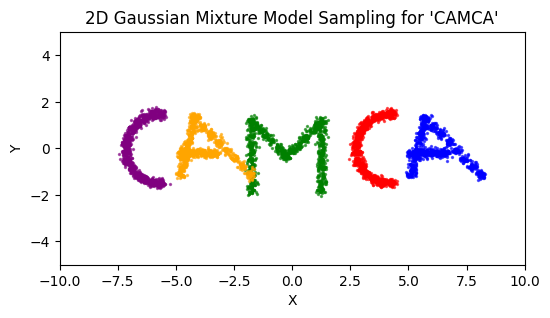

In [8]:
import torch
import torch.nn as nn
import torch.optim as optim
from diffusion_laboratory.sde import StochasticDifferentialEquation
from diffusion_laboratory.linalg import ScalarLinearOperator

from diffusion_laboratory.sde import ScalarSDE
import matplotlib.animation as animation
import distributions


import matplotlib.pyplot as plt

# Create the camca_Distribution instance
camca_dist = distributions.CAMCA_Distribution(bandwidth=0.1)
n=1000
# Sample 1000 points
samples_C1= camca_dist.sample(0,n)
samples_A1 = camca_dist.sample(1,n)
samples_M = camca_dist.sample(2,n)
samples_C2= camca_dist.sample(3,n)
samples_A2 = camca_dist.sample(4,n)
CAMCA=[samples_C1,samples_A1,samples_M,samples_C2,samples_A2]
samples =torch.concat(CAMCA,dim=0)

# Plot the sampled points
plt.figure(figsize=(6, 6))
plt.scatter(samples[0:n, 0].numpy(), samples[0:n, 1].numpy(), s=2, color='red', alpha=0.6)
plt.scatter(samples[n:n*2, 0].numpy(), samples[n:n*2, 1].numpy(), s=2, color='blue', alpha=0.6)
plt.scatter(samples[n*2:n*3, 0].numpy(), samples[n*2:n*3, 1].numpy(), s=2, color='green', alpha=0.6)
plt.scatter(samples[n*3:n*4, 0].numpy(), samples[n*3:n*4:, 1].numpy(), s=2, color='purple', alpha=0.6)
plt.scatter(samples[n*4:n*5, 0].numpy(), samples[n*4:n*5:, 1].numpy(), s=2, color='orange', alpha=0.6)

plt.title("2D Gaussian Mixture Model Sampling for 'CAMCA'")
plt.xlabel("X")
plt.ylabel("Y")
plt.xlim(-10, 10)
plt.ylim(-5, 5)
plt.gca().set_aspect('equal', adjustable='box')
plt.savefig("camca_distribution.png")

# Langevin Dynamics Simulation with CAMCA Distribution

This section simulates Langevin dynamics on the previously defined CAMCA distribution and visualizes the time evolution of the samples through animation.

---

## Step 2: Define Drift and Diffusion Functions for Langevin Dynamics

The `f(x, t)` function represents the drift term, which calculates the score of the CAMCA distribution, while `G(x, t)` provides the diffusion term using a scalar linear operator.


Sampling step 1/99
Sampling step 2/99
Sampling step 3/99
Sampling step 4/99
Sampling step 5/99
Sampling step 6/99
Sampling step 7/99
Sampling step 8/99
Sampling step 9/99
Sampling step 10/99
Sampling step 11/99
Sampling step 12/99
Sampling step 13/99
Sampling step 14/99
Sampling step 15/99
Sampling step 16/99
Sampling step 17/99
Sampling step 18/99
Sampling step 19/99
Sampling step 20/99
Sampling step 21/99
Sampling step 22/99
Sampling step 23/99
Sampling step 24/99
Sampling step 25/99
Sampling step 26/99
Sampling step 27/99
Sampling step 28/99
Sampling step 29/99
Sampling step 30/99
Sampling step 31/99
Sampling step 32/99
Sampling step 33/99
Sampling step 34/99
Sampling step 35/99
Sampling step 36/99
Sampling step 37/99
Sampling step 38/99
Sampling step 39/99
Sampling step 40/99
Sampling step 41/99
Sampling step 42/99
Sampling step 43/99
Sampling step 44/99
Sampling step 45/99
Sampling step 46/99
Sampling step 47/99
Sampling step 48/99
Sampling step 49/99
Sampling step 50/99
Sampling 

/var/folders/_3/l_pbw9lj6ylfhwzbl_3yk83c0000gn/T/ipykernel_22432/1875464945.py:22: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc="upper right")


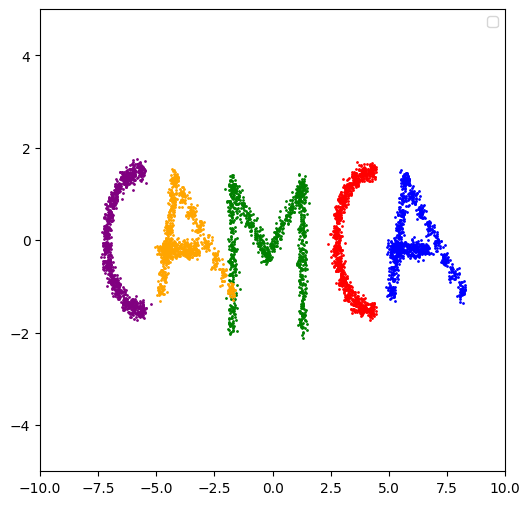

In [2]:
def f(x, t): 
    return camca_dist.score(x)
def G(x, t): 
    return ScalarLinearOperator(1.0)

    
langevin_dynamics_SDE = StochasticDifferentialEquation(f=f, G=G)
timesteps = torch.linspace(0.0, 1.0, 100)
xt = langevin_dynamics_SDE.sample(samples, timesteps, sampler='euler', return_all=True, verbose=True)

# plot the samples
fig = plt.figure(figsize=(6, 6))
ln_C1, = plt.plot(xt[0][:n, 0], xt[0][:n, 1], 'o', color='red', markersize=1)
ln_A1, = plt.plot(xt[0][n:n*2, 0], xt[0][n:n*2, 1], 'o', color='blue', markersize=1)
ln_M,  = plt.plot(xt[0][n*2:n*3, 0], xt[0][n*2:n*3, 1], 'o', color='green', markersize=1)
ln_C2, = plt.plot(xt[0][n*3:n*4, 0], xt[0][n*3:n*4, 1], 'o', color='purple', markersize=1)
ln_A2, = plt.plot(xt[0][n*4:n*5, 0], xt[0][n*4:n*5, 1], 'o', color='orange', markersize=1)
plt.xlim(-10, 10)
plt.ylim(-5, 5)

# Add labels
plt.legend(loc="upper right")

# Update function for animation
def update(frame):
    ln_C1.set_data(xt[frame][:n, 0], xt[frame][:n, 1])
    ln_A1.set_data(xt[frame][n:n*2, 0], xt[frame][n:n*2, 1])
    ln_M.set_data(xt[frame][n*2:n*3, 0], xt[frame][n*2:n*3, 1])
    ln_C2.set_data(xt[frame][n*3:n*4, 0], xt[frame][n*3:n*4, 1])
    ln_A2.set_data(xt[frame][n*4:n*5, 0], xt[frame][n*4:n*5, 1])
    #print(f"Animated Frame: {frame}")
    return ln_C1, ln_A1, ln_M,ln_C2,ln_A2

# Create the animation
ani = animation.FuncAnimation(fig, update, frames=len(timesteps), blit=False)

# Save the animation using ffmpeg
writer = animation.FFMpegWriter(fps=10, bitrate=5000, extra_args=['-pix_fmt', 'yuv420p', '-crf', '15'])
ani.save('camca_langevin_dynamics.mp4', writer=writer, dpi=300)


# Forward Diffusion Process Simulation with CAMCA Distribution

In this section, we implement a forward diffusion process on the CAMCA distribution. This simulation models the gradual diffusion of the initial data, generating increasingly noisy samples over time.

---

## Step 3: Define Diffusion Parameters

Set up the key parameters for the forward diffusion process. The `signal_scale` and `noise_variance` functions define how the signal diminishes and noise increases over time, respectively, with their corresponding derivatives (`signal_scale_prime` and `noise_variance_prime`).

Sampling step 1/99
Sampling step 2/99
Sampling step 3/99
Sampling step 4/99
Sampling step 5/99
Sampling step 6/99
Sampling step 7/99
Sampling step 8/99
Sampling step 9/99
Sampling step 10/99
Sampling step 11/99
Sampling step 12/99
Sampling step 13/99
Sampling step 14/99
Sampling step 15/99
Sampling step 16/99
Sampling step 17/99
Sampling step 18/99
Sampling step 19/99
Sampling step 20/99
Sampling step 21/99
Sampling step 22/99
Sampling step 23/99
Sampling step 24/99
Sampling step 25/99
Sampling step 26/99
Sampling step 27/99
Sampling step 28/99
Sampling step 29/99
Sampling step 30/99
Sampling step 31/99
Sampling step 32/99
Sampling step 33/99
Sampling step 34/99
Sampling step 35/99
Sampling step 36/99
Sampling step 37/99
Sampling step 38/99
Sampling step 39/99
Sampling step 40/99
Sampling step 41/99
Sampling step 42/99
Sampling step 43/99
Sampling step 44/99
Sampling step 45/99
Sampling step 46/99
Sampling step 47/99
Sampling step 48/99
Sampling step 49/99
Sampling step 50/99
Sampling 

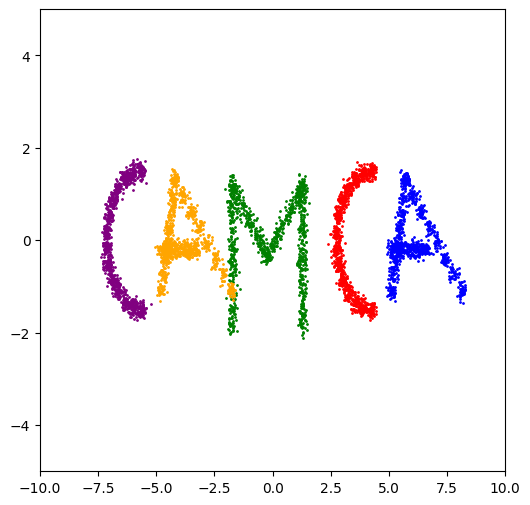

In [3]:
beta = torch.tensor(3.0)
signal_scale = lambda t: torch.exp(-0.5*beta*t)
noise_variance = lambda t: (1 - torch.exp(-beta*t))
signal_scale_prime = lambda t: -0.5*beta*torch.exp(-0.5*beta*t)
noise_variance_prime = lambda t: beta*torch.exp(-beta*t)

forward_diffusion_SDE = ScalarSDE(  signal_scale=signal_scale,
                                    noise_variance=noise_variance,
                                    signal_scale_prime=signal_scale_prime,
                                    noise_variance_prime=noise_variance_prime)

timesteps = torch.linspace(0.0, 1.0, 100)
xt = forward_diffusion_SDE.sample(samples, timesteps, sampler='euler', return_all=True, verbose=True)


# plot the samples
fig = plt.figure(figsize=(6, 6))
ln_C1, = plt.plot(xt[0][:n, 0], xt[0][:n, 1], 'o', color='red', markersize=1)
ln_A1, = plt.plot(xt[0][n:n*2, 0], xt[0][n:n*2, 1], 'o', color='blue', markersize=1)
ln_M, = plt.plot(xt[0][n*2:n*3, 0], xt[0][n*2:n*3, 1], 'o', color='green', markersize=1)
ln_C2, = plt.plot(xt[0][n*3:n*4, 0], xt[0][n*3:n*4, 1], 'o', color='purple', markersize=1)
ln_A2, = plt.plot(xt[0][n*4:n*5, 0], xt[0][n*4:n*5, 1], 'o', color='orange', markersize=1)

plt.xlim(-10, 10)
plt.ylim(-5, 5)



# Create the animation
ani = animation.FuncAnimation(fig, update, frames=len(timesteps), blit=False)

# Higher quality video with ffmpeg settings
writer = animation.writers['ffmpeg'](fps=10, bitrate=5000, extra_args=['-pix_fmt', 'yuv420p', '-crf', '15'])
ani.save('camca_forward_diffusion.mp4', writer=writer, dpi=300)

print("Done!")


# Score Estimator Network for Denoising 2D Points

The following section defines a score estimator network that takes noisy 2D points along with a time component as input, and outputs denoised 2D points. This network will be used in the reverse diffusion process to estimate the denoised score.

## Step 4: Define the Denoiser Network

The Denoiser class defines a fully connected neural network for estimating scores. The input to the network includes both the 2D coordinates and a time variable, while the output consists of the estimated denoised 2D coordinates. Here’s a breakdown of the network architecture:

Input: Concatenated 2D position and time (3-dimensional input)
Hidden Layers: Nine fully connected layers with intermediate dimensions, each followed by Layer Normalization and SiLU activation.
Output Layer: A fully connected layer producing a 2-dimensional output, which is then added to the input 2D coordinates for residual learning.

In [4]:
# Define the score estimator network (2d points + time  -> denoised 2d points)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
class Denoiser(nn.Module):
    def __init__(self):
        super(Denoiser, self).__init__()
        self.fc = nn.Sequential(
            nn.Linear(3, 64),   nn.LayerNorm(64), nn.SiLU(),
            nn.Linear(64, 128), nn.LayerNorm(128),nn.SiLU(),
            nn.Linear(128, 256),nn.LayerNorm(256),nn.SiLU(),
            nn.Linear(256, 512),nn.LayerNorm(512),nn.SiLU(),
            nn.Linear(512, 256),nn.LayerNorm(256),nn.SiLU(),
            nn.Linear(256, 128),nn.LayerNorm(128),nn.SiLU(),
            nn.Linear(128, 256),nn.LayerNorm(256),nn.SiLU(),
            nn.Linear(256, 128),nn.LayerNorm(128),nn.SiLU(),
            nn.Linear(128, 64), nn.LayerNorm(64),nn.SiLU(),
            nn.Linear(64, 2)  # Output 2D score estimate
        )
    
    def forward(self, x, t):
        # Concatenate 2D position and time
        input = torch.cat([x, t], dim=1)
        return self.fc(input)+x

# Instantiate the score estimator
denoiser = Denoiser().to(device)


# Training the Score Estimator Network with Score Matching

The following code trains the `Denoiser` network using a score matching objective. The network learns to estimate the "denoised" 2D coordinates by minimizing the difference between the true and estimated scores. This is crucial for the reverse diffusion process.


## Step 5: Define the Training Loop for Score Matching

The train_score_estimator function performs score matching by minimizing the mean squared error (MSE) between the true and estimated scores for the given input samples.

The train_score_estimator function is called with the forward diffusion SDE and the initialized score estimator network.



In [5]:

# Adam optimizer
optimizer = optim.Adam(denoiser.parameters(), lr=1e-4)
# Training loop for score matching
def train_score_estimator(forward_sde, score_estimator, num_epochs=2000, batch_size=300):
    
    active_batch=batch_size*5
    for epoch in range(num_epochs):
        # Sample 1000 points per character
        # Sample from the camca distribution
        CAMCA=[]
        for i in range (5):
            CAMCA.append(camca_dist.sample(i,batch_size))
        x0 =torch.concat(CAMCA,dim=0).to(device)  

        t = torch.rand(active_batch, 1).to(device)  # Uniformly sample t from [0, 1)
        t=(1.0-1e-2)*t+1e-2
        # Get x_t given x_0 from the forward SDE
        xt = forward_sde.sample_x_t_given_x_0(x0, t)
        
        # Compute the score estimate
        x0_est = score_estimator(xt, t)

        # Score matching loss (MSE between estimated and true score)
        loss = (((x0_est - x0)) ** 2).mean()
        
        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if epoch % 100 == 0:
            print(f"Epoch [{epoch}/{num_epochs}], Loss: {loss.item()}")

    # save the trained score estimator
    torch.save(denoiser.state_dict(), 'denoiser.pth')

# Train the score estimator
train_score_estimator(forward_diffusion_SDE, denoiser)



Epoch [0/2000], Loss: 4.431632041931152
Epoch [100/2000], Loss: 1.9713308811187744
Epoch [200/2000], Loss: 1.9911792278289795
Epoch [300/2000], Loss: 1.9403769969940186
Epoch [400/2000], Loss: 2.1147708892822266
Epoch [500/2000], Loss: 1.920901894569397
Epoch [600/2000], Loss: 2.0400946140289307
Epoch [700/2000], Loss: 2.0381228923797607
Epoch [800/2000], Loss: 1.9597135782241821
Epoch [900/2000], Loss: 2.0782971382141113
Epoch [1000/2000], Loss: 2.0349090099334717
Epoch [1100/2000], Loss: 1.875331163406372
Epoch [1200/2000], Loss: 2.1558451652526855
Epoch [1300/2000], Loss: 2.0545735359191895
Epoch [1400/2000], Loss: 1.9056041240692139
Epoch [1500/2000], Loss: 1.9026198387145996
Epoch [1600/2000], Loss: 1.7646350860595703
Epoch [1700/2000], Loss: 1.9704521894454956
Epoch [1800/2000], Loss: 1.948253870010376
Epoch [1900/2000], Loss: 2.1474411487579346


# Reverse Diffusion Process using Trained Score Estimator

This section performs the reverse diffusion process, where the learned `Denoiser` network is used to estimate scores and guide the transformation of noisy samples back to their original state.


## Step 6: Define Score Estimator Function

The score_estimator function utilizes the Denoiser model to compute the score (estimated denoised points) required for the reverse diffusion process. This function leverages Sigma, the noise scaling factor, and mu, the mean estimate, to compute the estimated score.

In [6]:
  # if the weights exist, load them
try:
    denoiser.load_state_dict(torch.load('denoiser.pth'))
except:
    print("No weights found for the score estimator. Training the score estimator...")


def score_estimator(x, t):
    x0_pred = denoiser(x, t)
    Sigma = forward_diffusion_SDE.Sigma(t)
    Sigma.scalar += 1e-8  # Add small constant to avoid division by zero
    mu = forward_diffusion_SDE.H(t) @ x0_pred
    return -1.0 * (Sigma.inverse_LinearOperator() @ (x - mu))


/var/folders/_3/l_pbw9lj6ylfhwzbl_3yk83c0000gn/T/ipykernel_22432/999421475.py:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  denoiser.load_state_dict(torch.load('denoiser.

## Step 3: Execute Reverse Diffusion with Trained Score Estimator

With the trained Denoiser and score estimator, the reverse diffusion process starts from the final timestep xT of the forward diffusion, progressing backward through time.

Sampling step 1/299
Sampling step 2/299
Sampling step 3/299
Sampling step 4/299
Sampling step 5/299
Sampling step 6/299
Sampling step 7/299
Sampling step 8/299
Sampling step 9/299
Sampling step 10/299
Sampling step 11/299
Sampling step 12/299
Sampling step 13/299
Sampling step 14/299
Sampling step 15/299
Sampling step 16/299
Sampling step 17/299
Sampling step 18/299
Sampling step 19/299
Sampling step 20/299
Sampling step 21/299
Sampling step 22/299
Sampling step 23/299
Sampling step 24/299
Sampling step 25/299
Sampling step 26/299
Sampling step 27/299
Sampling step 28/299
Sampling step 29/299
Sampling step 30/299
Sampling step 31/299
Sampling step 32/299
Sampling step 33/299
Sampling step 34/299
Sampling step 35/299
Sampling step 36/299
Sampling step 37/299
Sampling step 38/299
Sampling step 39/299
Sampling step 40/299
Sampling step 41/299
Sampling step 42/299
Sampling step 43/299
Sampling step 44/299
Sampling step 45/299
Sampling step 46/299
Sampling step 47/299
Sampling step 48/299
S

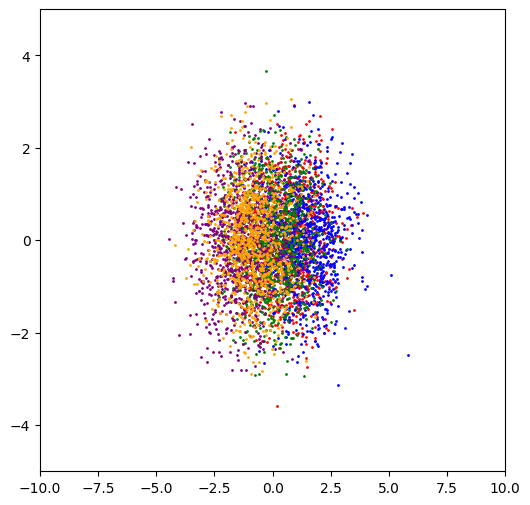

In [7]:

with torch.no_grad():
    denoiser.eval()

    # Get the reverse SDE using the trained score estimator
    reverse_diffusion_SDE = forward_diffusion_SDE.reverse_SDE_given_score_estimator(score_estimator)

    # from the end of the Forward Process
    xT=xt[-1].to(device) 

    n_reverse_steps=300
    reverse_timesteps = torch.linspace(1.0, 0.0, n_reverse_steps).to(device)
    xt_reverse = reverse_diffusion_SDE.sample(xT, reverse_timesteps, sampler='euler', return_all=True, verbose=True)


# plot the samples

fig = plt.figure(figsize=(6, 6))
ln_C1, = plt.plot(xt_reverse[0][:n, 0], xt_reverse[0][:n, 1], 'o', color='red', markersize=1)
ln_A1, = plt.plot(xt_reverse[0][n:n*2, 0], xt_reverse[0][n:n*2, 1], 'o', color='blue', markersize=1)
ln_M, = plt.plot(xt_reverse[0][n*2:n*3, 0], xt_reverse[0][n*2:n*3, 1], 'o', color='green', markersize=1)
ln_C2, = plt.plot(xt_reverse[0][n*3:n*4, 0], xt_reverse[0][n*3:n*4, 1], 'o', color='purple', markersize=1)
ln_A2, = plt.plot(xt_reverse[0][n*4:n*5, 0], xt_reverse[0][n*4:n*5, 1], 'o', color='orange', markersize=1)
plt.xlim(-10, 10)
plt.ylim(-5, 5)

# Update function for animation
def update(frame):

    ln_C1.set_data(xt_reverse[frame][0:n, 0].detach(), xt_reverse[frame][0:n, 1].detach())
    ln_A1.set_data(xt_reverse[frame][n:n*2, 0].detach(), xt_reverse[frame][n:n*2, 1].detach())
    ln_M.set_data(xt_reverse[frame][n*2:n*3, 0].detach(), xt_reverse[frame][n*2:n*3, 1].detach())
    ln_C2.set_data(xt_reverse[frame][n*3:n*4, 0].detach(), xt_reverse[frame][n*3:n*4, 1].detach())
    ln_A2.set_data(xt_reverse[frame][n*4:n*5, 0].detach(), xt_reverse[frame][n*4:n*5, 1].detach())
    
    
    print(f"Animated Frame: {frame}")
    return ln_C1, ln_A1, ln_M,ln_C2, ln_A2


# Create the animation
ani = animation.FuncAnimation(fig, update, frames=len(xt_reverse), blit=False)

# Higher quality video with ffmpeg settings
writer = animation.writers['ffmpeg'](fps=30, bitrate=5000, extra_args=['-pix_fmt', 'yuv420p', '-crf', '15'])
ani.save('camca_reverse_diffusion.mp4', writer=writer, dpi=300)

print("Done!")